In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

BASE_PATH = "/".join(os.getcwd().split("/")) # base directory level

BIN_PATH = os.path.join(BASE_PATH, "bin")  # where my scripts live
DATA_PATH = os.path.join(BASE_PATH, "data")  # where I dump new data.
RESULTS_PATH = os.path.join(BASE_PATH, "results")  # where I analyze results

SRC_PATH = os.path.join(BASE_PATH, "src")  # where any packages needed to run analyses live. I haven't started structuring things this way yet. 

COMP_PATH = os.path.join(DATA_PATH,"pairwise/hsmrca")
#COMP_PATH = os.path.join(DATA_PATH,"pairwise/reference")

In [2]:
# Function for custom colormaps, from
# https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72

import matplotlib.colors as mcolors

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]
def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [3]:
comp_list = pd.read_csv('/wynton/group/capra/projects/modern_human_3Dgenome/results/comp_tables/pairwise_subsample_genomewide_averages.csv',
                       index_col=0)

In [66]:
comp_list

,ind1,ind2,super1,sub1,sex1,ind1.1,super2,sub2,sex2,ind2.1,...,avg_spearman,avg_divergence,super1.1,sub1.1,sex1.1,ind1.2,super2.1,sub2.1,sex2.1,ind2.2
0,AFR_ASW_female_NA19917,AFR_ASW_female_NA19901,AFR,ASW,female,NA19917,AFR,ASW,female,NA19901,...,0.996195,0.003805,AFR,ASW,female,NA19917,AFR,ASW,female,NA19901
1,AFR_ASW_female_NA19917,AFR_ASW_female_NA20314,AFR,ASW,female,NA19917,AFR,ASW,female,NA20314,...,0.996164,0.003836,AFR,ASW,female,NA19917,AFR,ASW,female,NA20314
2,AFR_ASW_female_NA19917,AFR_ASW_female_NA20317,AFR,ASW,female,NA19917,AFR,ASW,female,NA20317,...,0.995868,0.004132,AFR,ASW,female,NA19917,AFR,ASW,female,NA20317
3,AFR_ASW_female_NA19917,AFR_ASW_female_NA19625,AFR,ASW,female,NA19917,AFR,ASW,female,NA19625,...,0.995808,0.004192,AFR,ASW,female,NA19917,AFR,ASW,female,NA19625
4,AFR_ASW_female_NA19917,AFR_ACB_female_HG02337,AFR,ASW,female,NA19917,AFR,ACB,female,HG02337,...,0.995922,0.004078,AFR,ASW,female,NA19917,AFR,ACB,female,HG02337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8380,EUR_CEU_female_NA12044,EUR_CEU_female_NA06985,EUR,CEU,female,NA12044,EUR,CEU,female,NA06985,...,0.997105,0.002895,EUR,CEU,female,NA12044,EUR,CEU,female,NA06985
8381,EUR_CEU_female_NA12044,EUR_CEU_female_NA12046,EUR,CEU,female,NA12044,EUR,CEU,female,NA12046,...,0.997350,0.002650,EUR,CEU,female,NA12044,EUR,CEU,female,NA12046
8382,EUR_CEU_female_NA07000,EUR_CEU_female_NA06985,EUR,CEU,female,NA07000,EUR,CEU,female,NA06985,...,0.997287,0.002713,EUR,CEU,female,NA07000,EUR,CEU,female,NA06985
8383,EUR_CEU_female_NA07000,EUR_CEU_female_NA12046,EUR,CEU,female,NA07000,EUR,CEU,female,NA12046,...,0.997193,0.002807,EUR,CEU,female,NA07000,EUR,CEU,female,NA12046


In [4]:
all_indivs = list(set(comp_list.ind1.unique()) | set(comp_list.ind2.unique()))

In [23]:
windows = pd.read_table('%s/intermediates/windows_to_keep.csv' % DATA_PATH, sep=',', index_col=[1,2]).drop(columns=['Unnamed: 0'])

In [25]:
windows

Empty DataFrame
Columns: []
Index: [(chr1, 1048576), (chr1, 1572864), (chr1, 3145728), (chr1, 3670016), (chr1, 4194304), (chr1, 4718592), (chr1, 5242880), (chr1, 5767168), (chr1, 6291456), (chr1, 6815744), (chr1, 7340032), (chr1, 7864320), (chr1, 8388608), (chr1, 8912896), (chr1, 9437184), (chr1, 9961472), (chr1, 10485760), (chr1, 11010048), (chr1, 11534336), (chr1, 13107200), (chr1, 13631488), (chr1, 14155776), (chr1, 14680064), (chr1, 15204352), (chr1, 15728640), (chr1, 17301504), (chr1, 17825792), (chr1, 18350080), (chr1, 18874368), (chr1, 19398656), (chr1, 19922944), (chr1, 20447232), (chr1, 20971520), (chr1, 21495808), (chr1, 22020096), (chr1, 22544384), (chr1, 23068672), (chr1, 23592960), (chr1, 24117248), (chr1, 24641536), (chr1, 25165824), (chr1, 25690112), (chr1, 26214400), (chr1, 26738688), (chr1, 27262976), (chr1, 27787264), (chr1, 28311552), (chr1, 29884416), (chr1, 30408704), (chr1, 30932992), (chr1, 31457280), (chr1, 31981568), (chr1, 32505856), (chr1, 33030144), (chr1, 33554432), (chr1, 34078720), (chr1, 34603008), (chr1, 35127296), (chr1, 35651584), (chr1, 36175872), (chr1, 36700160), (chr1, 37224448), (chr1, 37748736), (chr1, 38273024), (chr1, 38797312), (chr1, 39321600), (chr1, 39845888), (chr1, 40370176), (chr1, 40894464), (chr1, 41418752), (chr1, 41943040), (chr1, 42467328), (chr1, 42991616), (chr1, 43515904), (chr1, 44040192), (chr1, 44564480), (chr1, 45088768), (chr1, 45613056), (chr1, 46137344), (chr1, 46661632), (chr1, 47185920), (chr1, 47710208), (chr1, 48234496), (chr1, 48758784), (chr1, 49283072), (chr1, 49807360), (chr1, 50331648), (chr1, 50855936), (chr1, 51380224), (chr1, 51904512), (chr1, 52428800), (chr1, 52953088), (chr1, 53477376), (chr1, 54001664), (chr1, 54525952), (chr1, 55050240), (chr1, 55574528), (chr1, 56098816), (chr1, 56623104), (chr1, 57147392), ...]

[4873 rows x 0 columns]

In [26]:
 df = pd.read_csv(f"{seqComps_dir}/SeqComps_{all_indivs[0]}_vs_{all_indivs[1]}.txt", sep="\t", index_col=[0,1])

In [79]:
float(df.loc[windows.index[0]]['seqComp_raw'])

0.9987106323242188

In [104]:
def one_comparison_parse(ind1, ind2, matrix_seq, dict_seq, windows ):
    df = pd.read_csv(f"{seqComps_dir}/SeqComps_{ind1}_vs_{ind2}.txt", sep="\t", index_col=[0,1])
    df = df.loc[windows.index]
    avg = 1-df['seqComp_raw'].astype('float').mean()
    matrix_seq.loc[ind1,ind2] = avg
    matrix_seq.loc[ind2,ind1] = avg
    for w in windows.index:
        window_seq_diff = 1-float(df.loc[w]['seqComp_raw'])
        dict_seq[w].loc[ind1,ind2] = window_seq_diff
        dict_seq[w].loc[ind2,ind1] = window_seq_diff

    return matrix_seq, dict_seq


In [109]:
seqComps_dir = "/wynton/group/capra/projects/modern_human_3Dgenome/data/pairwise/sequence/1KGvs1KG"
count = 0
dict_seq = {k: pd.DataFrame(index=all_indivs, columns=all_indivs,dtype='float') for k in windows.index} # takes about  50 sec
matrix_seq = pd.DataFrame(index=all_indivs, columns=all_indivs,dtype='float')
for i in comp_list.index: # 3 minutes per 50 iterations, 503 minutes total, 8 hours
    ind1 = comp_list.loc[i]['ind1']
    ind2 = comp_list.loc[i]['ind2']
    matrix_seq, dict_seq = one_comparison_parse(ind1, ind2, matrix_seq, dict_seq, windows)
    count +=1 
    if count%50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900


: 

In [ ]:
pickle.dump( dict_seq, open( "dict_seq.p", "wb" ) )
pickle.dump( matrix_seq, open( "matrix_seq.p", "wb" ) )

In [5]:
# Read in sequence-level comparisons between MH & AHs, organize into matrix

seqComps_dir = "/wynton/group/capra/projects/modern_human_3Dgenome/data/pairwise/sequence/1KGvs1KG"
count = 0
matrix_seq = pd.DataFrame(index=all_indivs, columns=all_indivs,dtype='float')
for i in all_indivs:
    for j in all_indivs:
        if i != j:
            try: 
                df = pd.read_csv(f"{seqComps_dir}/SeqComps_{i}_vs_{j}.txt", sep="\t")
                df = df[(df["%s_coverage"% i] >= 0.95) & (df["%s_coverage"% j] >= 0.95)]
                num = 1-df['seqComp_raw'].astype('float').mean()
                count +=1
            except FileNotFoundError:
                df = pd.read_csv(f"{seqComps_dir}/SeqComps_{j}_vs_{i}.txt", sep="\t")
                df = df[(df["%s_coverage"% i] >= 0.95) & (df["%s_coverage"% j] >= 0.95)]
                num = 1-df['seqComp_raw'].astype('float').mean()
                count +=1
            matrix_seq.loc[i,j] = num
            matrix_seq.loc[j,i] = num
        else:
            matrix_seq.loc[i,i] = 0
        if count%100 == 0:
            print(count)
            
# Shorten labels
matrix_seq.columns = ["_".join(np.array(x.split("_"))[[0,1,3]]) if "_" in x else x for x in matrix_seq.columns]
matrix_seq.index = ["_".join(np.array(x.split("_"))[[0,1,3]]) if "_" in x else x for x in matrix_seq.index]
matrix_seq.head()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700


,AMR_PUR_HG01198,SAS_PJL_HG02655,EAS_CHS_HG00596,AFR_YRI_NA19137,AFR_ASW_NA19901,EUR_TSI_NA20769,EAS_CDX_HG01799,EAS_CHS_HG00608,AMR_MXL_NA19779,EUR_IBS_HG01746,...,EUR_IBS_HG01684,AMR_MXL_NA19758,SAS_STU_HG03944,AFR_MSL_HG03458,EUR_IBS_HG01522,AMR_PEL_HG02147,EAS_CDX_HG02188,AFR_ACB_HG02095,EAS_KHV_HG01869,SAS_ITU_HG03772
AMR_PUR_HG01198,0.000000,0.000939,0.000948,0.001238,0.001215,0.000907,0.000963,0.000953,0.000925,0.000901,...,0.000907,0.000925,0.000950,0.001258,0.000904,0.000920,0.000956,0.001218,0.000960,0.000951
SAS_PJL_HG02655,0.000939,0.000000,0.000886,0.001244,0.001215,0.000855,0.000898,0.000894,0.000892,0.000863,...,0.000863,0.000878,0.000864,0.001264,0.000860,0.000884,0.000889,0.001221,0.000898,0.000861
EAS_CHS_HG00596,0.000948,0.000886,0.000000,0.001235,0.001213,0.000906,0.000726,0.000714,0.000890,0.000910,...,0.000907,0.000821,0.000873,0.001255,0.000906,0.000807,0.000714,0.001221,0.000727,0.000867
AFR_YRI_NA19137,0.001238,0.001244,0.001235,0.000000,0.001214,0.001241,0.001248,0.001244,0.001248,0.001241,...,0.001243,0.001244,0.001247,0.001221,0.001246,0.001250,0.001242,0.001208,0.001252,0.001250
AFR_ASW_NA19901,0.001215,0.001215,0.001213,0.001214,0.000000,0.001206,0.001219,0.001214,0.001216,0.001212,...,0.001206,0.001212,0.001212,0.001232,0.001209,0.001217,0.001214,0.001223,0.001222,0.001220


In [6]:
# Organized 3d-genome divergence comparisons between MH & AHs into a matrix

matrix_3d = pd.DataFrame(index=all_indivs, columns=all_indivs,dtype='float')
count = 0
for i in all_indivs:
    for j in all_indivs:
        dfi = comp_list[(comp_list.ind1 ==i) & (comp_list.ind2 ==j)]
        dfj = comp_list[(comp_list.ind1 ==j) & (comp_list.ind2 ==i)]
        if i != j and dfi.shape[0] == 1: 
            count +=1
            matrix_3d.loc[i,j] = float(dfi['avg_divergence'])
            matrix_3d.loc[j,i] = float(dfi['avg_divergence'])
        if i != j and dfj.shape[0] == 1:
            count +=1
            matrix_3d.loc[i,j] = float(dfj['avg_divergence'])
            matrix_3d.loc[j,i] = float(dfj['avg_divergence'])
        else:
            matrix_3d.loc[i,i] = 0
        if count%500 == 0:
            print(count)

# Shorten labels
matrix_3d.columns = ["_".join(np.array(x.split("_"))[[0,1,3]]) if "_" in x else x for x in matrix_3d.columns]
matrix_3d.index = ["_".join(np.array(x.split("_"))[[0,1,3]]) if "_" in x else x for x in matrix_3d.index]

matrix_3d.head()

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13000
13500
14000
14500
15000
15500
16000
16500


,EAS_JPT_NA18951,AMR_PEL_HG01954,AMR_PUR_HG00638,SAS_BEB_HG04183,AFR_YRI_NA19137,EAS_CHB_NA18541,SAS_GIH_NA20882,AMR_PEL_HG02147,EAS_CHS_HG00531,EUR_FIN_HG00334,...,AFR_ASW_NA19901,AFR_YRI_NA19172,EUR_GBR_HG00130,EAS_CHB_NA18631,SAS_ITU_HG03772,AFR_LWK_NA19446,EAS_CDX_HG00864,AFR_ESN_HG02974,EUR_FIN_HG00326,EAS_JPT_NA18981
EAS_JPT_NA18951,0.000000,0.002797,0.002920,0.002843,0.003687,0.002296,0.003046,0.002738,0.002342,0.002931,...,0.003675,0.003957,0.002781,0.002496,0.002811,0.003926,0.002524,0.003922,0.002815,0.002478
AMR_PEL_HG01954,0.002797,0.000000,0.003044,0.002789,0.003861,0.002550,0.002978,0.002101,0.002518,0.002892,...,0.003821,0.003847,0.002905,0.002470,0.002896,0.004129,0.002582,0.003885,0.002898,0.002416
AMR_PUR_HG00638,0.002920,0.003044,0.000000,0.003039,0.003719,0.002969,0.003027,0.002966,0.003112,0.002844,...,0.003602,0.003865,0.002650,0.003186,0.003208,0.003851,0.002988,0.003955,0.002963,0.003247
SAS_BEB_HG04183,0.002843,0.002789,0.003039,0.000000,0.003833,0.002788,0.002857,0.002799,0.002754,0.002857,...,0.003744,0.003881,0.002821,0.002879,0.002785,0.004081,0.002816,0.003958,0.002927,0.002834
AFR_YRI_NA19137,0.003687,0.003861,0.003719,0.003833,0.000000,0.003860,0.003852,0.003835,0.003592,0.003955,...,0.003668,0.003702,0.003624,0.003760,0.003859,0.003977,0.003667,0.003616,0.003904,0.003867


/wynton/home/capra/egilbertson/envs/akita/lib/python3.6/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


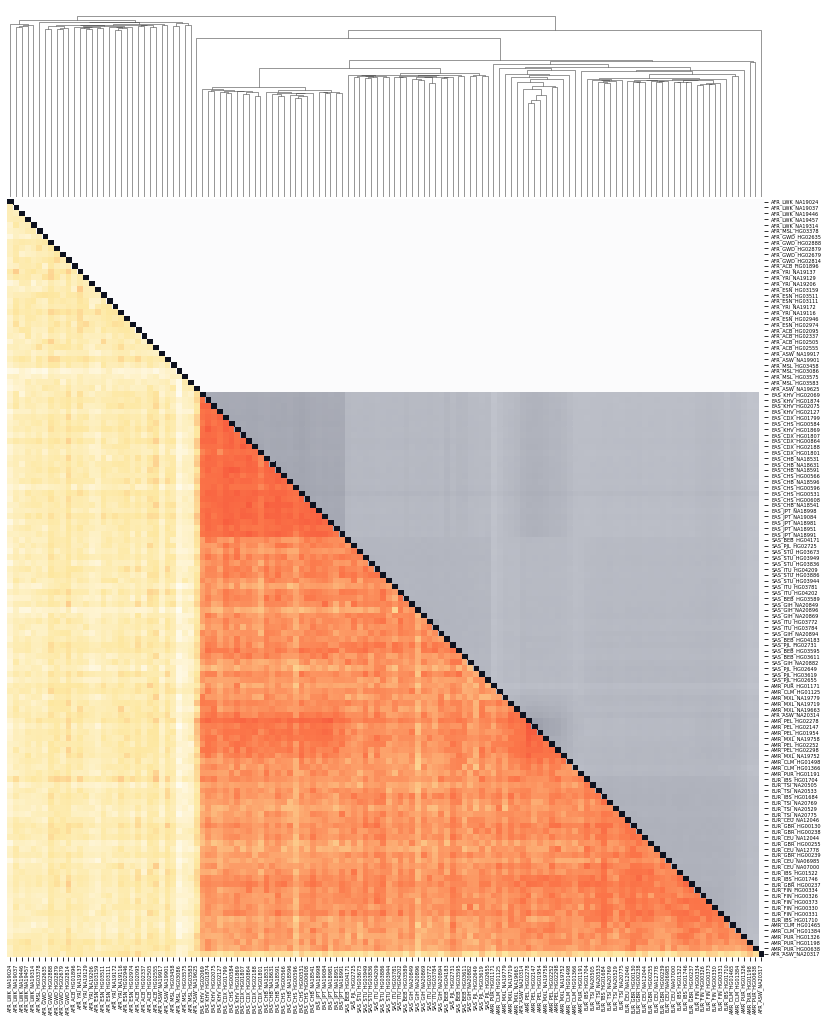

In [7]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
from matplotlib.patches import Rectangle

# colormaps
cmap_seq = get_continuous_cmap(['#0e121ff','#9699a5','#c9ccd4','#fcfcfd'],float_list=[0, 0.5,0.99, 1])
cmap_3d = get_continuous_cmap(["#c5000e",'f44132','#fc774a',"fee8a1","#fffdf2"])
#cmap_seq = get_continuous_cmap(['#0e121ff','#9699a5','#c9ccd4','#fcfcfd'])


# Linkage and cluster baseds on sequence
linkage = hc.linkage(sp.distance.squareform(matrix_seq), method='complete',optimal_ordering=True) # complete, single, average, weighted
g = sns.clustermap(matrix_seq*2**20, row_linkage=linkage,square=True, figsize=(15,15),col_linkage=linkage, cmap = cmap_seq, vmin=150, vmax=1100, yticklabels=True, xticklabels=True)

# Flip
g.ax_heatmap.invert_xaxis()
g.ax_heatmap.invert_yaxis()
g.ax_row_dendrogram.invert_yaxis()
g.ax_col_dendrogram.invert_xaxis()
_ = g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 5)
_ = g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 5)

# Color bottom triangle based on 3d genome

order = g.dendrogram_col.reordered_ind
order = [all_indivs[x] for x in order]
order = ["_".join(np.array(x.split("_"))[[0,1,3]]) if "_" in x else x for x in order]

ax = g.ax_heatmap

for i,indiv1 in enumerate(order):
    for j,indiv2 in enumerate(order):
        if i > j:
            _ = ax.add_patch(Rectangle((i-.03, j), 1.2, 1, fc=cmap_3d((matrix_3d.loc[indiv1,indiv2]-0.00043)/(0.00476-0.00043)),linewidth=0,ec=None))

g.cax.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
#plt.savefig("heatmap3dandSeq.pdf");
#plt.savefig("/home/mcarthe/heatmap3dandSeq.pdf");

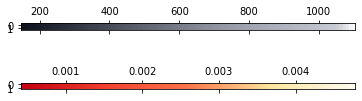

In [8]:
cmap_seq = get_continuous_cmap(['#0e121ff','#9699a5','#c9ccd4','#fcfcfd'],float_list=[0, 0.6,0.95, 1])

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6,2));

ax[0].matshow(np.array([np.linspace(150,1100,100),np.linspace(150,1100,100)]), cmap=cmap_seq, vmin=150, vmax=1100);
# vrange: 150 - 1100
#(m - rmin)/(rmax - rmin) * (tmax - tmin) + tmin
ax[0].set_xticks([((x - 150)/(1100 - 150) * 99) for x in np.arange(200,1100,200)]);
ax[0].set_xticklabels(np.arange(200,1100,200));

ax[1].matshow(np.array([np.linspace(0,1,100),np.linspace(0,1,100)]), cmap= cmap_3d);
# vrange = 0.00043 - 0.00476
ax[1].set_xticks([((x - 0.00043)/(0.00476 - 0.00043) * 99) for x in np.arange(0.001,0.00476,0.001)]);
ax[1].set_xticklabels(np.arange(0.001,0.00476,0.001));

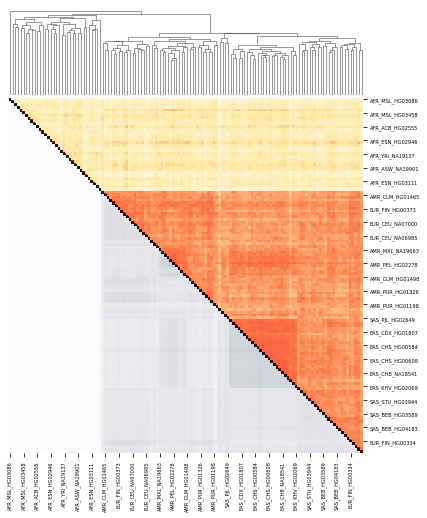

In [10]:
# Visualize together

from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
from matplotlib.patches import Rectangle

# colormaps
cmap_seq = get_continuous_cmap(['#0e121ff','#9699a5','#c9ccd4','#fcfcfd'],float_list=[0, 0.40,0.58, 1])
cmap_3d = get_continuous_cmap(["#c5000e",'f44132','#fc774a',"fee8a1","#fffdf2"])

# Linkage and cluster baseds on sequence
linkage = hc.linkage(sp.distance.squareform(matrix_3d), method='complete',optimal_ordering=True) # complete, single, average, weighted
g = sns.clustermap(matrix_3d, row_linkage=linkage, col_linkage=linkage, cmap = cmap_3d,figsize=(8,8), vmin=0.00043, vmax=0.00476)

#g.ax_col_dendrogram.invert_xaxis()
_ = g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 5)
_ = g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 5)

# Color bottom triangle based on 3d genome

order = g.dendrogram_col.reordered_ind
order = [all_indivs[x] for x in order]
order = ["_".join(np.array(x.split("_"))[[0,1,3]]) if "_" in x else x for x in order]

ax = g.ax_heatmap

for i,indiv1 in enumerate(order):
    for j,indiv2 in enumerate(order):
        if i >= j:
            _ = ax.add_patch(Rectangle((j,i-0.03), 1, 1.2, fc=cmap_seq(((2**20*matrix_seq.loc[indiv1,indiv2])-150)/(1100-150)),linewidth=0,ec=None))
        #elif i == j:
            
            
g.cax.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
#plt.savefig("/home/mcarthe/heatmap3dandSeq_clusterby3d.pdf");


In [119]:
!pwd

/wynton/group/capra/projects/modern_human_3Dgenome/bin/activeNotebooks


In [147]:
np.nanmean(matrix_seq)

0.0010272449125470645

In [28]:
matrix_seq

,AMR_PUR_HG01171,EAS_CDX_HG01801,EUR_GBR_HG00255,AMR_MXL_NA19719,AMR_MXL_NA19663,EUR_CEU_NA07000,SAS_GIH_NA20869,EUR_GBR_HG00130,AFR_LWK_NA19314,SAS_PJL_HG02649,...,AFR_ESN_HG03159,AMR_CLM_HG01465,EAS_KHV_HG02069,AFR_MSL_HG03086,EAS_CHB_NA18541,SAS_ITU_HG03772,EUR_CEU_NA12778,AFR_GWD_HG02888,SAS_STU_HG03673,SAS_BEB_HG03595
AMR_PUR_HG01171,0.000000,0.000962,0.000906,0.000926,0.000929,0.000906,0.000935,0.000910,0.001214,0.000935,...,0.001234,0.000909,0.000966,0.001245,0.000954,0.000948,0.000901,0.001227,0.000955,0.000945
EAS_CDX_HG01801,0.000962,0.000000,0.000918,0.000894,0.000876,0.000919,0.000879,0.000917,0.001228,0.000899,...,0.001250,0.000907,0.000758,0.001258,0.000759,0.000876,0.000921,0.001241,0.000883,0.000861
EUR_GBR_HG00255,0.000906,0.000918,0.000000,0.000879,0.000893,0.000815,0.000876,0.000810,0.001230,0.000861,...,0.001258,0.000842,0.000926,0.001261,0.000913,0.000886,0.000813,0.001238,0.000892,0.000888
AMR_MXL_NA19719,0.000926,0.000894,0.000879,0.000000,0.000843,0.000870,0.000898,0.000870,0.001228,0.000891,...,0.001248,0.000862,0.000895,0.001255,0.000883,0.000900,0.000873,0.001234,0.000911,0.000895
AMR_MXL_NA19663,0.000929,0.000876,0.000893,0.000843,0.000000,0.000887,0.000895,0.000886,0.001224,0.000898,...,0.001245,0.000874,0.000883,0.001255,0.000868,0.000902,0.000890,0.001237,0.000908,0.000895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAS_ITU_HG03772,0.000948,0.000876,0.000886,0.000900,0.000902,0.000891,0.000838,0.000884,0.001223,0.000854,...,0.001248,0.000898,0.000878,0.001258,0.000881,0.000000,0.000890,0.001243,0.000853,0.000851
EUR_CEU_NA12778,0.000901,0.000921,0.000813,0.000873,0.000890,0.000811,0.000875,0.000812,0.001232,0.000857,...,0.001260,0.000841,0.000923,0.001261,0.000913,0.000890,0.000000,0.001238,0.000888,0.000887
AFR_GWD_HG02888,0.001227,0.001241,0.001238,0.001234,0.001237,0.001246,0.001233,0.001234,0.001228,0.001236,...,0.001205,0.001233,0.001249,0.001214,0.001242,0.001243,0.001238,0.000000,0.001239,0.001243
SAS_STU_HG03673,0.000955,0.000883,0.000892,0.000911,0.000908,0.000890,0.000845,0.000889,0.001230,0.000862,...,0.001253,0.000898,0.000886,0.001259,0.000884,0.000853,0.000888,0.001239,0.000000,0.000855
